C:\Users\SANDRO\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: No contour levels were found within the data range.
C:\Users\SANDRO\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: No contour levels were found within the data range.
C:\Users\SANDRO\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: No contour levels were found within the data range.


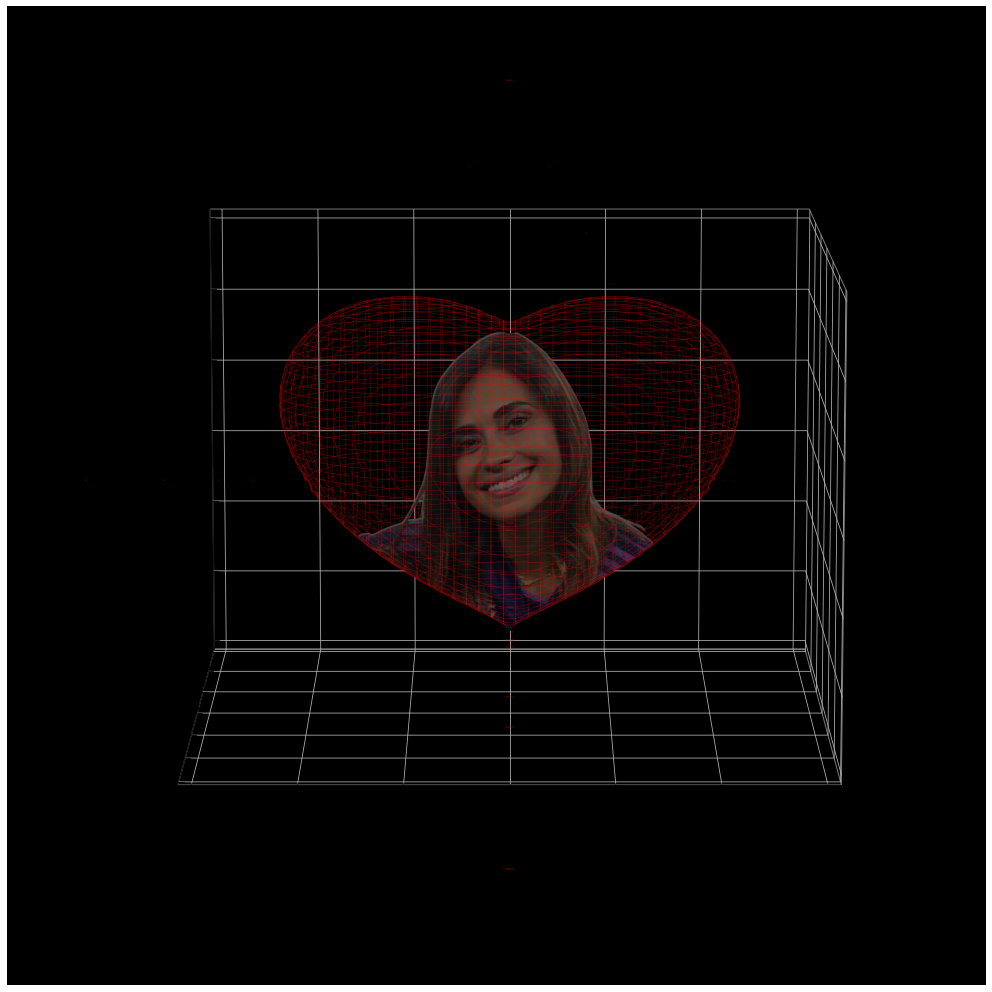

In [6]:
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import HTML

# Definir la función que genera la superficie del corazón
def corazon_3d(x,y,z):
    a = (x**2 + (9/4)*(y**2) + z**2 - 1)**3
    b = x**2*z**3
    c = (9/80)*(y**2)*(z**3)
    return a - b - c

# Crear la figura y el eje 3D
bbox=(-1.5, 1.5)
xmin, xmax, ymin, ymax, zmin, zmax = bbox*3

fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(xmin, xmax)
ax.set_ylim3d(ymin, ymax)
ax.set_zlim3d(zmin, zmax)
ax.set_facecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Inicializar la superficie del corazón
M = np.linspace(xmin, xmax, 100)
N = np.linspace(xmin, xmax, 50)
M1, M2 = np.meshgrid(M, M)

for z in N:
    X, Y = M1, M2
    Z = corazon_3d(X, Y, z)
    cset = ax.contour(X, Y, Z+z, [z], zdir='z', colors=('red'), linewidths=0.2)

for y in N:
    X, Z = M1, M2
    Y = corazon_3d(X, y, Z)
    cset = ax.contour(X, Y+y, Z, [y], zdir='y', colors=('red'), linewidths=0.2)

for x in N:
    Y, Z = M1, M2
    X = corazon_3d(x, Y, Z)
    cset = ax.contour(X+x, Y, Z, [x], zdir='x',colors=('red'), linewidths=0.2)

# Obtener la imagen
img = Image.open('images/antonela.png')
img = np.array(img.convert("RGBA"))

# Escalar la imagen para que se ajuste al rango de los ejes
x = np.linspace(-0.75, 0.75, img.shape[1])
y = np.linspace(-1, 1, img.shape[0])
X1, Y1 = np.meshgrid(x, y)

# Obtener la extensión del corazón
R, G, B, A = img[:, :, 0], img[:, :, 1], img[:, :, 2], img[:, :, 3]

# Normalizar los canales RGB para que estén en el rango [0, 1]
R_norm, G_norm, B_norm, A_norm = R/255.0, G/255.0, B/255.0, A/255.0

# Aplicar la máscara a los canales RGBA de la imagen
mask = corazon_3d(X1, 0, -Y1) < 0
R_norm[~mask], G_norm[~mask], B_norm[~mask], A_norm[~mask] = 0, 0, 0, 0

# Graficar la imagen como una superficie en el plano z
ax.plot_surface(X1, np.zeros_like(X1), -Y1, facecolors=np.dstack((R_norm, G_norm, B_norm, A_norm)), rstride=1, cstride=1)

In [7]:
# Definir la función de animación
def animate(i):
    # Calcular el ángulo de elevación
    if i <= 180:
        # Elevación cuando gira de 0° a 180°
        elev = 10 + 0.1*i
    else:
        # Elevación cuando gira de 180° a 360° 
        elev = 28 - 0.1*(i - 180)
    
    # Actualizar la vista de la gráfica
    ax.view_init(elev=elev, azim=i)
    return fig,

# Crear la animación
anim = animation.FuncAnimation(fig,
                               animate,
                               frames=360,
                               interval=25,
                               blit=True)

# Guardar la animación
anim.save('3D_heart_image.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# Mostrar la animación
HTML(anim.to_html5_video())